In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale, minmax_scale, robust_scale
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from statsmodels.api import Logit

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingClassifier

def root_mean_squared_error(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

from sklearn.svm import SVC
# from sklearn.neural_network import MLPClassifier

In [35]:
df_raw = pd.read_csv("2BD/유방암.csv", encoding="euc-kr")

In [36]:
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [37]:
df_raw.isnull().sum(axis = 0)

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

<Axes: >

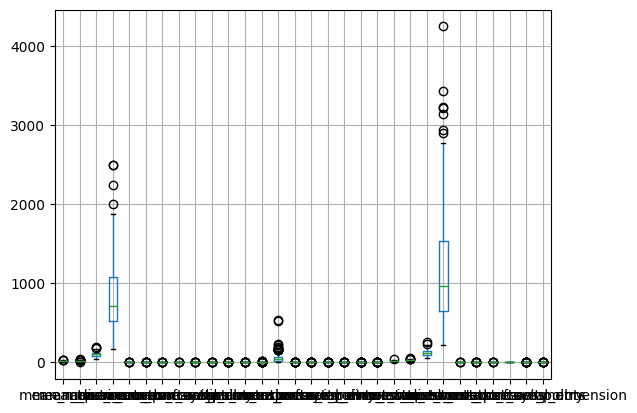

In [38]:
df_raw.boxplot()

<Axes: >

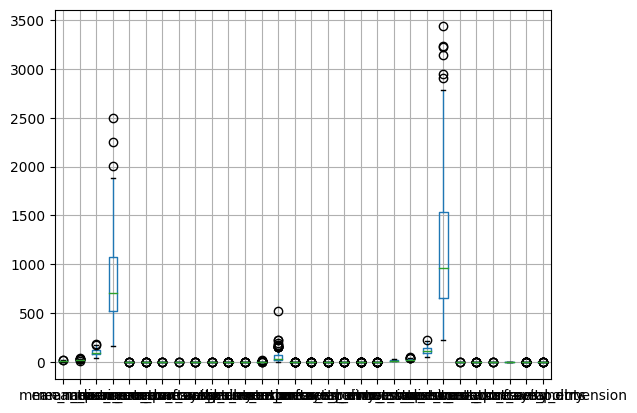

In [42]:
df_raw = df_raw[df_raw["worst_area"]<4000] #이상치 제거
df_raw.boxplot()

In [43]:
df_raw_x=df_raw.drop("diagnosis", axis=1, inplace=False) #설명변수 설정
df_raw_y=df_raw["diagnosis"] #목표변수 설정
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state =1234)
df_train_x, df_validation_x, df_train_y, df_validation_y = train_test_split(df_train_x, df_train_y, test_size = 3/7, random_state =1234)
print(df_train_x.shape)
print(df_train_y.shape)
print(df_validation_x.shape)
print(df_validation_y.shape)
print(df_test_x.shape)
print(df_test_y.shape)

(127, 30)
(127,)
(96, 30)
(96,)
(96, 30)
(96,)


In [45]:
svm_uncustomized=SVC(random_state=1234)
svm_uncustomized.fit(df_train_x,df_train_y)
print('Accuracy on training set:{:.3f}'.format(svm_uncustomized.score(df_train_x,df_train_y)))
print('Accuracy on validation set:{:.3f}'.format(svm_uncustomized.score(df_validation_x,df_validation_y)))

Accuracy on training set:0.890
Accuracy on validation set:0.896


In [46]:
svm_uncustomized

SVC(random_state=1234)

In [48]:
train_accuracy=[]; validation_accuracy=[]

para_c=[10**c for c in range(-2,2)]
for v_C in para_c:
    svm=SVC(C=v_C,random_state=1234)
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    validation_accuracy.append(svm.score(df_validation_x,df_validation_y))

df_accuracy_c=pd.DataFrame()
df_accuracy_c['C']=para_c
df_accuracy_c['TrainAccuracy']=train_accuracy
df_accuracy_c['validationAccuracy']=validation_accuracy

In [49]:
df_accuracy_c.round(3)

,C,TrainAccuracy,validationAccuracy
0,0.01,0.646,0.625
1,0.10,0.890,0.885
2,1.00,0.890,0.896
3,10.00,0.898,0.896


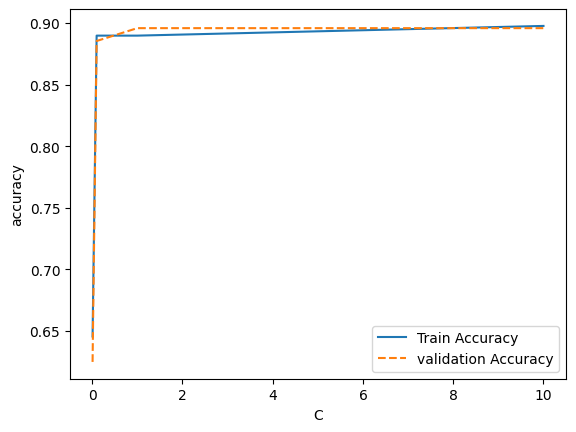

In [50]:
plt.plot(para_c,train_accuracy,linestyle='-',label='Train Accuracy')
plt.plot(para_c,validation_accuracy,linestyle='--',label='validation Accuracy')
plt.ylabel('accuracy');plt.xlabel('C')
plt.legend()

In [52]:
train_accuracy=[]; validation_accuracy=[]

para_gamma=[10**gamma for gamma in range(-2,2)]
for v_gamma in para_gamma:
    svm=SVC(gamma=v_gamma,C=0.1,random_state=1234)
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    validation_accuracy.append(svm.score(df_validation_x,df_validation_y))

df_accuracy_gamma=pd.DataFrame()
df_accuracy_gamma['gamma']=para_gamma
df_accuracy_gamma['TrainAccuracy']=train_accuracy
df_accuracy_gamma['validationAccuracy']=validation_accuracy

In [53]:
df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,validationAccuracy
0,0.01,0.6457,0.625
1,0.10,0.6457,0.625
2,1.00,0.6457,0.625
3,10.00,0.6457,0.625


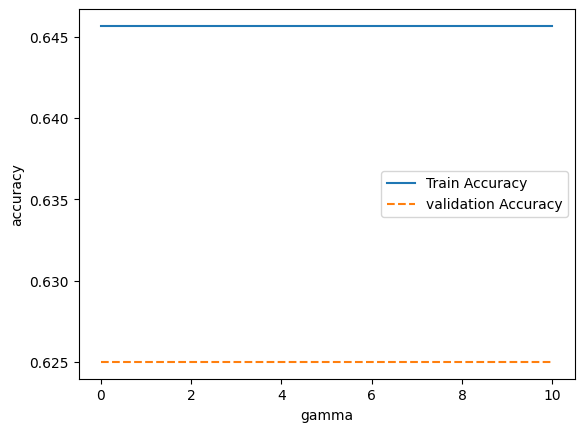

In [54]:
plt.plot(para_gamma,train_accuracy,linestyle='-',label='Train Accuracy')
plt.plot(para_gamma,validation_accuracy,linestyle='--',label='validation Accuracy')
plt.ylabel('accuracy');plt.xlabel('gamma')
plt.legend()

In [55]:
v_feature_name=df_train_x.columns
#StandardScaler 적용
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_raw_x)
df_scaled=pd.DataFrame(df_scaled,columns=v_feature_name)
df_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.149953,-0.876078,-0.157752,-0.225688,-0.742264,-0.475636,-0.548009,-0.625746,-0.994440,-0.395324,...,-0.141016,-1.153338,-0.145315,-0.217604,0.489609,0.141368,-0.089828,-0.297443,0.523224,0.508600
1,-1.321390,-2.560747,-1.339039,-1.169693,-0.238060,-1.150838,-1.147397,-1.201726,-1.770011,0.181207,...,-1.353561,-2.513007,-1.395147,-1.150902,0.253712,-1.043079,-1.157006,-1.479597,-1.387952,-0.508698
2,0.715067,-0.416843,0.622424,0.627335,-0.944508,-0.671957,-0.474086,-0.206038,-0.896129,-1.176566,...,0.554675,-0.141029,0.464843,0.464328,-0.612674,-0.364621,0.008932,0.178883,0.221763,-0.888004
3,-0.204186,-1.299058,-0.249468,-0.303785,-1.288603,-0.657758,-0.788170,-0.833302,-0.655811,-0.836775,...,-0.256964,-1.487466,-0.307078,-0.352044,-1.337522,-0.167023,-0.172207,-0.454227,-0.525399,-0.222599
4,-0.754653,-1.736540,-0.822595,-0.753437,-2.091257,-1.502637,-1.179760,-1.329211,-1.930222,-0.959322,...,-0.956585,-1.930764,-1.005213,-0.886562,-1.781009,-1.105900,-1.091946,-1.365667,-1.072067,-0.899468


In [56]:
df_scaled_train_x,df_scaled_test_x=train_test_split(df_scaled,test_size=0.3,random_state=1234)
df_scaled_train_x,df_scaled_validation_x=train_test_split(df_scaled_train_x,test_size=3/7,random_state=1234)
print("train data X size:{}".format(df_scaled_train_x.shape))
print("validation data X size:{}".format(df_scaled_validation_x.shape))
print("test data X size:{}".format(df_scaled_test_x.shape))

train data X size:(127, 30)
validation data X size:(96, 30)
test data X size:(96, 30)


In [57]:
v_feature_name=df_train_x.columns
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_raw_x)
df_scaled=pd.DataFrame(df_scaled,columns=v_feature_name)
df_scaled.head()
df_scaled_train_x,df_scaled_test_x=train_test_split(df_scaled,test_size=0.3,random_state=1234)
df_scaled_train_x,df_scaled_validation_x=train_test_split(df_scaled_train_x,test_size=3/7,random_state=1234)
print("train data X size:{}".format(df_scaled_train_x.shape))
print("validation data X size:{}".format(df_scaled_validation_x.shape))
print("test data X size:{}".format(df_scaled_test_x.shape))

train data X size:(127, 30)
validation data X size:(96, 30)
test data X size:(96, 30)


In [59]:
svm_scaled=SVC(random_state=1234)
svm_scaled.fit(df_scaled_train_x,df_train_y)
print('Accuracy on training set:{:.3f}'.format(svm_scaled.score(df_scaled_train_x,df_train_y)))
print('Accuracy on validation set:{:.3f}'.format(svm_scaled.score(df_scaled_validation_x,df_validation_y)))

Accuracy on training set:0.992
Accuracy on validation set:0.979


In [60]:
df_accuracy_c.round(3)

,C,TrainAccuracy,validationAccuracy
0,0.01,0.646,0.625
1,0.10,0.890,0.885
2,1.00,0.890,0.896
3,10.00,0.898,0.896


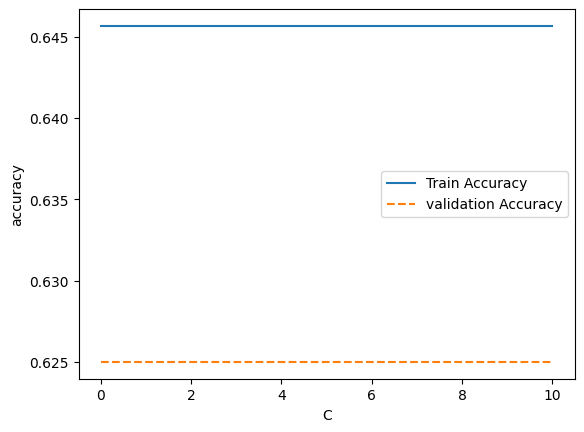

In [61]:
plt.plot(para_c,train_accuracy,linestyle='-',label='Train Accuracy')
plt.plot(para_c,validation_accuracy,linestyle='--',label='validation Accuracy')
plt.ylabel('accuracy');plt.xlabel('C')
plt.legend()

In [63]:
train_accuracy=[]; validation_accuracy=[]
para_gamma=[10**gamma for gamma in range(-2,2)]
for v_gamma in para_gamma:
    svm=SVC(gamma=v_gamma,C=1,random_state=1234)
    svm.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    validation_accuracy.append(svm.score(df_scaled_validation_x,df_validation_y))

df_accuracy_gamma=pd.DataFrame()
df_accuracy_gamma['gamma']=para_gamma
df_accuracy_gamma['TrainAccuracy']=train_accuracy
df_accuracy_gamma['validationAccuracy']=validation_accuracy

In [64]:
df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,validationAccuracy
0,0.01,0.976,0.990
1,0.10,0.992,0.938
2,1.00,1.000,0.625
3,10.00,1.000,0.625


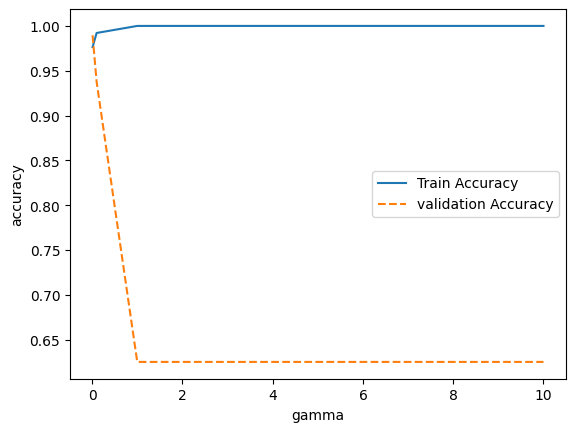

In [65]:
plt.plot(para_gamma,train_accuracy,linestyle='-',label='Train Accuracy')
plt.plot(para_gamma,validation_accuracy,linestyle='--',label='validation Accuracy')
plt.ylabel('accuracy');plt.xlabel('gamma')
plt.legend()

In [67]:
svc_final=SVC(gamma=0.1,C=1,random_state=1234)
svc_final.fit(df_scaled_train_x,df_train_y)
y_pred=svc_final.predict(df_scaled_test_x)
print('Accuracy on training set:{:.3f}'.format(svc_final.score(df_scaled_train_x,df_train_y)))
print('Accuracy on validation set:{:.3f}'.format(svc_final.score(df_scaled_validation_x,df_validation_y)))
print('Confusion matrix:\n{}'.format(confusion_matrix(df_validation_y,y_pred)))

Accuracy on training set:0.992
Accuracy on validation set:0.938
Confusion matrix:
[[ 6 30]
 [20 40]]


In [68]:
estimator=SVC(random_state=1234)
param_grid={'C':para_c,'gamma':para_gamma}
grid_svc=GridSearchCV(estimator,param_grid,scoring='accuracy',n_jobs=-1)
grid_svc.fit(df_scaled_train_x,df_train_y)

print("best estimator model:\n{}".format(grid_svc.best_estimator_))
print("\nbest parameter:\n{}".format(grid_svc.best_params_))
print("\nbest score:\n{}".format(grid_svc.best_score_.round(3)))

best estimator model:
SVC(C=10, gamma=0.01, random_state=1234)

best parameter:
{'C': 10, 'gamma': 0.01}

best score:
0.985


In [70]:
df_pred = pd.DataFrame({'prediction':svc_final.predict(df_test_x)}) #예측값
df_pred.describe()

,prediction
count,96
unique,1
top,음성
freq,96


In [71]:
df_test_y.describe()

count     96
unique     2
top       음성
freq      69
Name: diagnosis, dtype: object